In [18]:
pip install librosa

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 4.2 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 3.4 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 3.4 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------------------------ --------- 0.8/1.0 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
    --------------------------------------- 0.5/30.3 MB 2.4 MB/s eta 0:00:13
   - -------------------------------------- 1.3/30.3 MB 2.9 MB/s eta 0:00:10
   -- ------------------------------------- 1.8/30.3 MB 3.1 MB/s eta 0:00:10
   --- ----------------------

In [39]:
import librosa
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Audio folder path
audio_folder = "audio"
mp3_files = [f for f in os.listdir(audio_folder) if f.endswith(".mp3")]

# Check if files are detected
if not mp3_files:
    print("No MP3 files found in the 'audio' folder!")
    exit()

data = []

def extract_basic_features(file_path, country_name):
    try:
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)

        # Handle tempo extraction errors
        tempo = librosa.beat.tempo(y=y, sr=sr)
        tempo = float(tempo[0]) if len(tempo) > 0 else 0

        # Handle RMS energy NaN values
        rms_energy = np.nan_to_num(np.mean(librosa.feature.rms(y=y)))
        
        data.append({
            "Country": country_name,
            "Duration (s)": duration,
            "Tempo (BPM)": tempo,
            "Loudness (RMS Energy)": rms_energy
        })
    except Exception as e:
        print(f"Error processing {country_name}: {e}")

# Process each MP3 file
for file in mp3_files:
    country_name = file.replace(".mp3", "")
    file_path = os.path.join(audio_folder, file)
    extract_basic_features(file_path, country_name)

df = pd.DataFrame(data)

# Check if DataFrame is populated
if df.empty:
    print("No valid data extracted! Check audio files.")
    exit()

print(df)


                  Country  Duration (s)  Tempo (BPM)  Loudness (RMS Energy)
0             Afghanistan     74.004898   117.453835               0.079236
1                 Albania     65.959184    95.703125               0.111162
2                 Algeria     78.132245   117.453835               0.039450
3                 Andorra    156.969796   101.332721               0.066374
4                  Angola     81.920000   120.185320               0.099262
..                    ...           ...          ...                    ...
105           Saint Lucia     43.885714   126.048018               0.092180
106  United Arab Emirates     48.457143   123.046875               0.098874
107        United Kingdom     63.085714   117.453835               0.073968
108        Western Sahara     63.402086   101.332721               0.091262
109         Åland Islands     71.523265   126.048018               0.038232

[110 rows x 4 columns]


# Duration

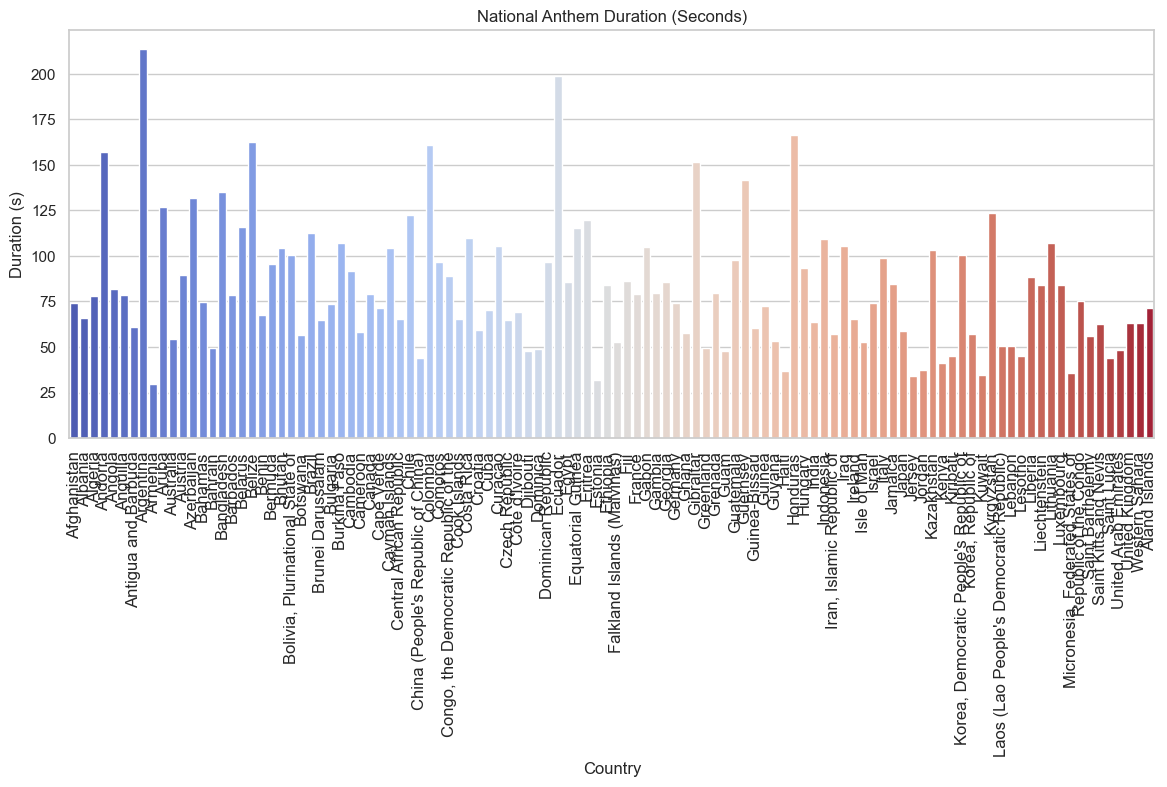

In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6)) 
sns.barplot(data=df, x="Country", y="Duration (s)", palette="coolwarm")
plt.title("National Anthem Duration (Seconds)")
plt.xticks(rotation=90, fontsize=12) 
plt.subplots_adjust(bottom=0.2) 
plt.show()

# Tempo

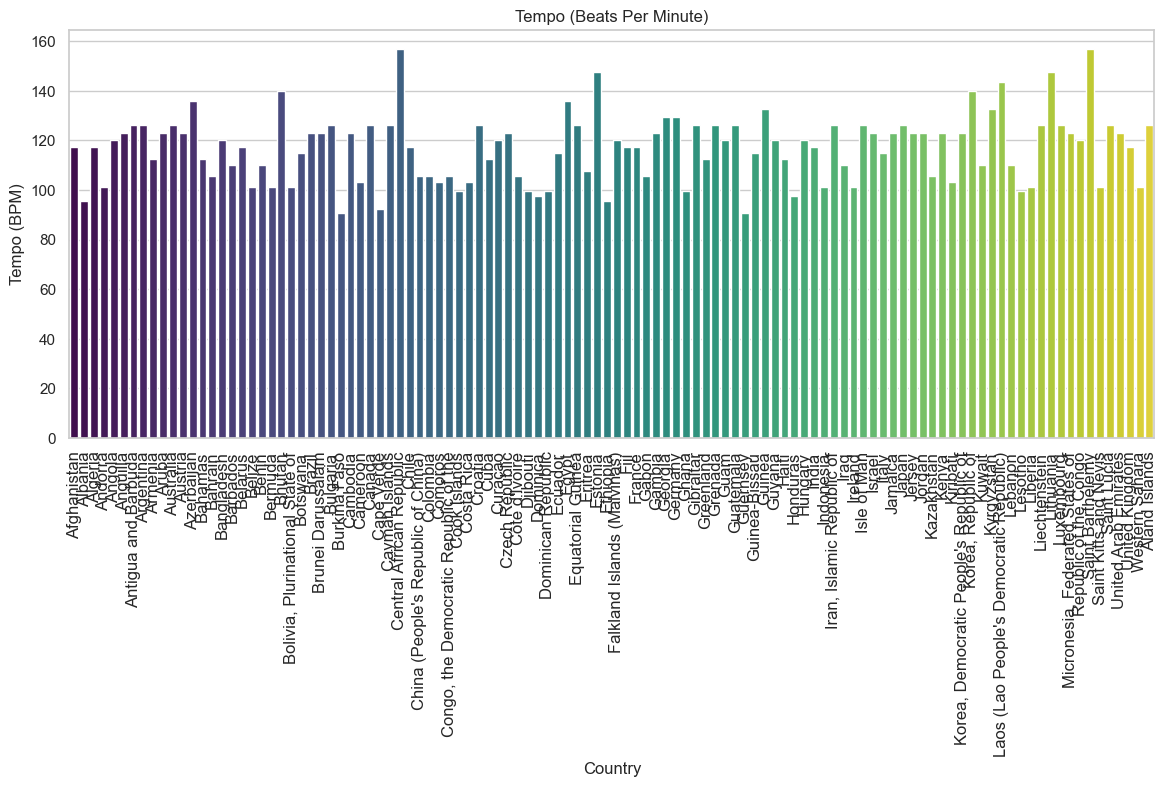

In [ ]:

plt.figure(figsize=(14, 6))  
sns.barplot(data=df, x="Country", y="Tempo (BPM)", palette="viridis")
plt.title("Tempo (Beats Per Minute)")
plt.xticks(rotation=90, fontsize=12)
plt.subplots_adjust(bottom=0.2)
plt.show()

# Loudness

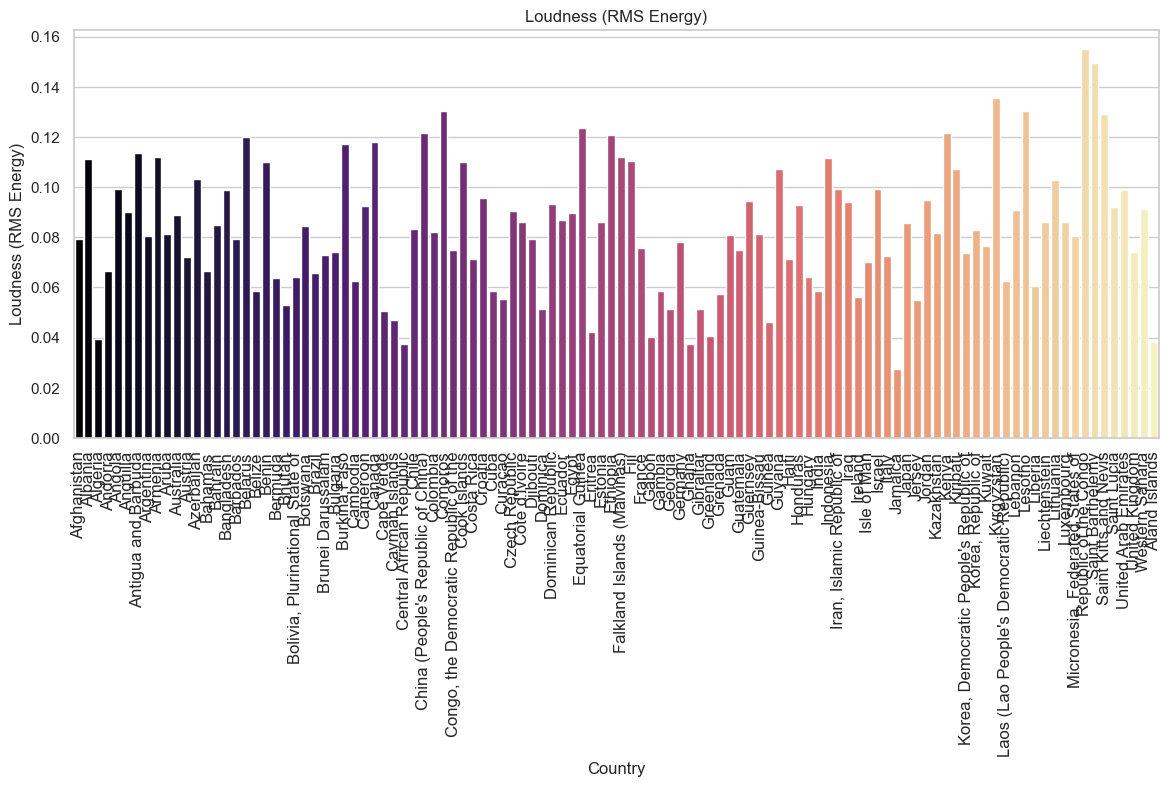

In [49]:
plt.figure(figsize=(14, 6))  
sns.barplot(data=df, x="Country", y="Loudness (RMS Energy)", palette="magma")
plt.title("Loudness (RMS Energy)")
plt.xticks(rotation=90, fontsize=12)
plt.subplots_adjust(bottom=0.2)
plt.show()

# Frequency-Based Analysis (Spectral Features)

In [50]:
data = []

def extract_spectral_features(file_path, country_name):
    try:
        y, sr = librosa.load(file_path, sr=None)
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        
        data.append({
            "Country": country_name,
            "Spectral Centroid": spectral_centroid,
            "Spectral Bandwidth": spectral_bandwidth,
            "Spectral Rolloff": spectral_rolloff
        })
    except Exception as e:
        print(f"Error processing {country_name}: {e}")

for file in mp3_files:
    country_name = file.replace(".mp3", "")
    file_path = os.path.join(audio_folder, file)
    extract_spectral_features(file_path, country_name)

df = pd.DataFrame(data)
print(df)


                  Country  Spectral Centroid  Spectral Bandwidth  \
0             Afghanistan        1851.069872         2027.325582   
1                 Albania        1553.111312         1895.528506   
2                 Algeria        1784.063629         2227.591712   
3                 Andorra        1670.794934         1805.724796   
4                  Angola        1764.343290         2314.248968   
..                    ...                ...                 ...   
105           Saint Lucia        1753.459982         2387.178666   
106  United Arab Emirates        1571.820442         1818.241711   
107        United Kingdom        1898.466894         2214.631780   
108        Western Sahara        1009.249933         1144.522469   
109         Åland Islands        1001.561629         1185.374880   

     Spectral Rolloff  
0         3321.048185  
1         2991.546289  
2         3492.285599  
3         3054.090144  
4         3610.755361  
..                ...  
105       3459.

# Spectral Centroid

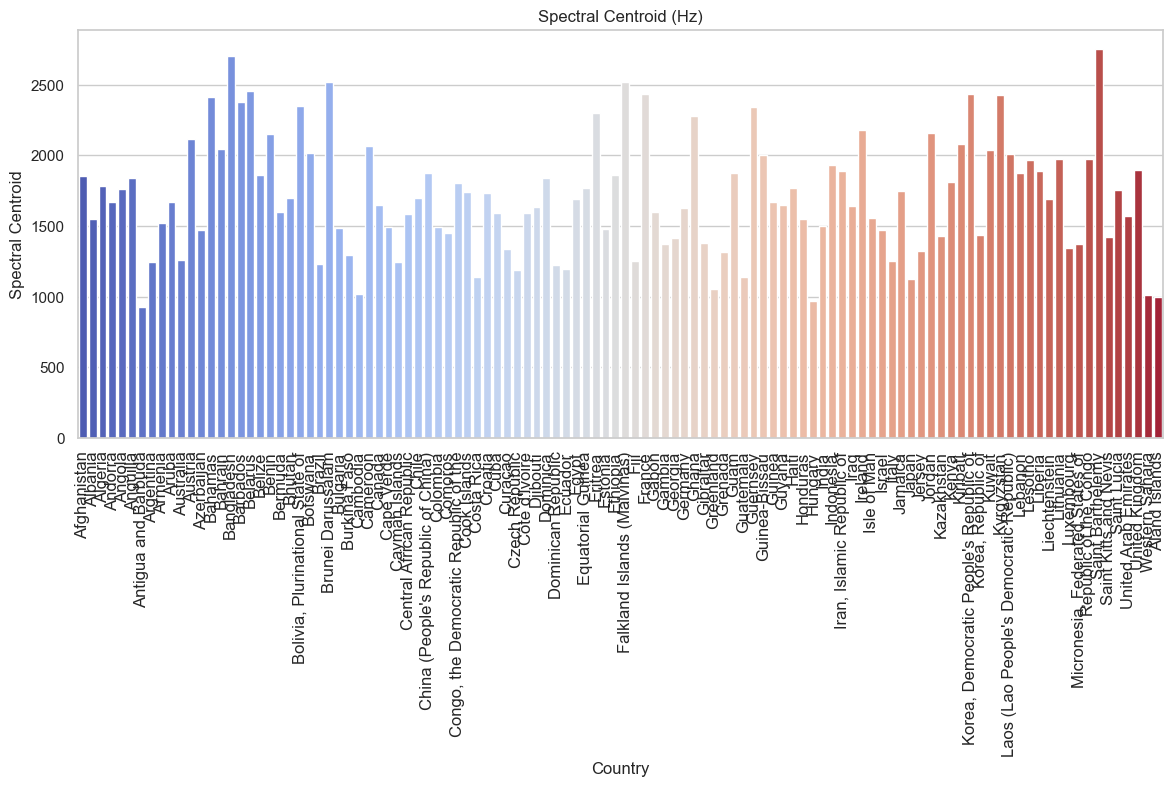

In [51]:

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))  
sns.barplot(data=df, x="Country", y="Spectral Centroid", palette="coolwarm")
plt.title("Spectral Centroid (Hz)")
plt.xticks(rotation=90, fontsize=12)
plt.subplots_adjust(bottom=0.2)
plt.show()

# Spectral Bandwidth

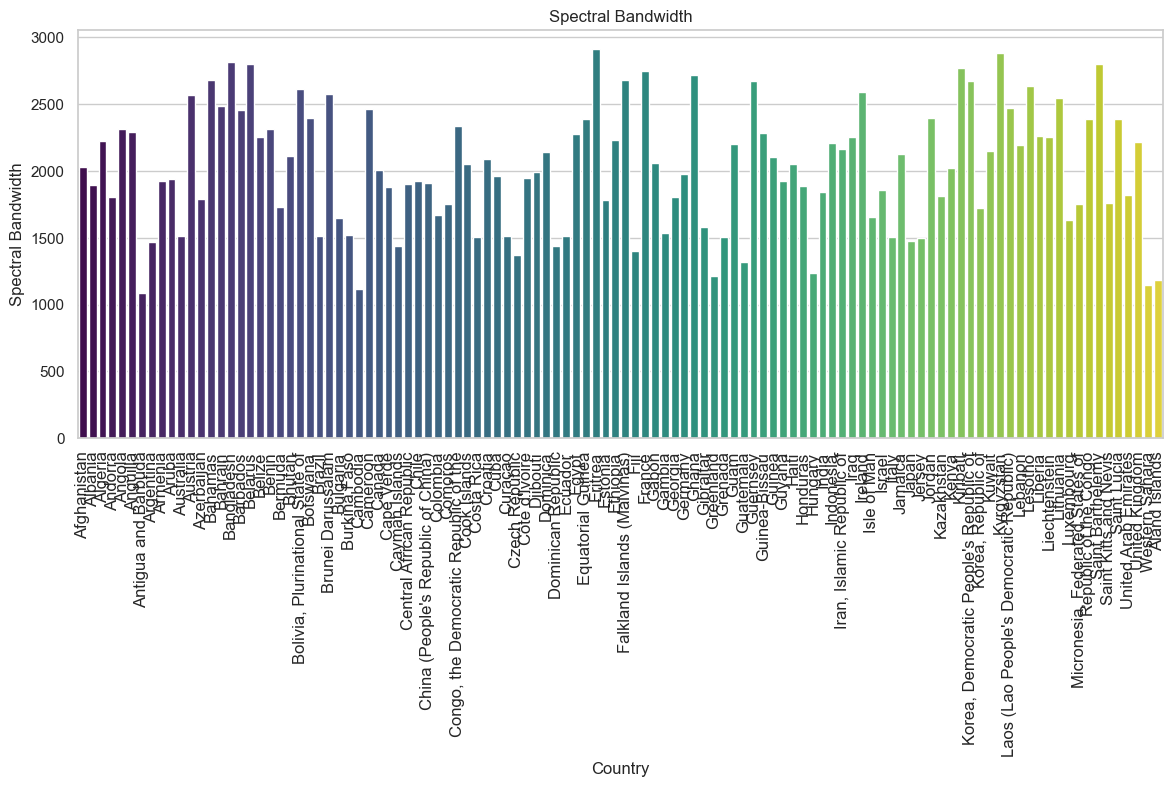

In [52]:
plt.figure(figsize=(14, 6))  
sns.barplot(data=df, x="Country", y="Spectral Bandwidth", palette="viridis")
plt.title("Spectral Bandwidth")
plt.xticks(rotation=90, fontsize=12)
plt.subplots_adjust(bottom=0.2)
plt.show()


# Spectral Rolloff

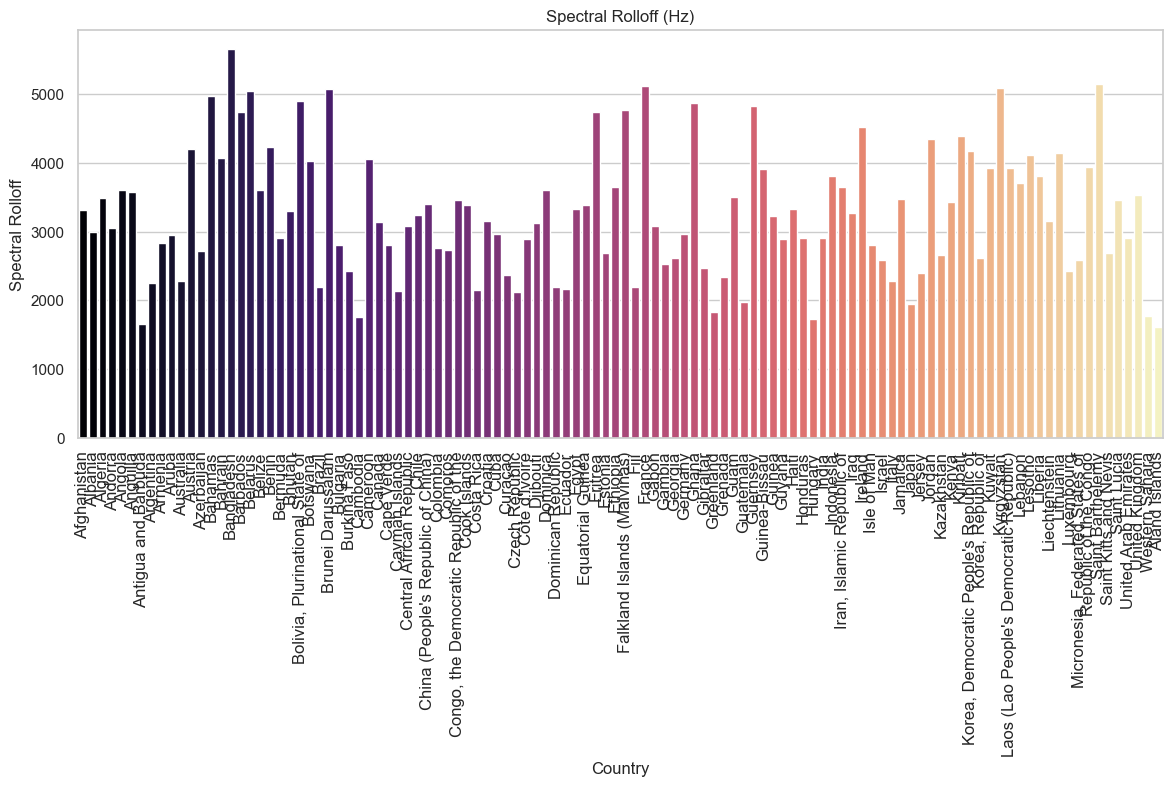

In [53]:
plt.figure(figsize=(14, 6)) 
sns.barplot(data=df, x="Country", y="Spectral Rolloff", palette="magma")
plt.title("Spectral Rolloff (Hz)")
plt.xticks(rotation=90, fontsize=12)
plt.subplots_adjust(bottom=0.2)
plt.show()

# Tonality Analysis (Chroma Features)

In [ ]:
data = []

def extract_chroma_features(file_path, country_name):
    try:
        y, sr = librosa.load(file_path, sr=None)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        
        chroma_mean = np.mean(chroma)
        chroma_var = np.var(chroma)
        
        data.append({
            "Country": country_name,
            "Chroma Mean": chroma_mean,
            "Chroma Variance": chroma_var
        })
    except Exception as e:
        print(f"Error processing {country_name}: {e}")

for file in mp3_files:
    country_name = file.replace(".mp3", "")
    file_path = os.path.join(audio_folder, file)
    extract_chroma_features(file_path, country_name)

df = pd.DataFrame(data)
print(df)


                  Country  Chroma Mean  Chroma Variance
0             Afghanistan     0.363247         0.086781
1                 Albania     0.320880         0.084494
2                 Algeria     0.352407         0.092851
3                 Andorra     0.302174         0.081790
4                  Angola     0.354139         0.080413
..                    ...          ...              ...
105           Saint Lucia     0.361137         0.086464
106  United Arab Emirates     0.314127         0.085235
107        United Kingdom     0.384378         0.082424
108        Western Sahara     0.310675         0.084037
109         Åland Islands     0.309123         0.086203

[110 rows x 3 columns]


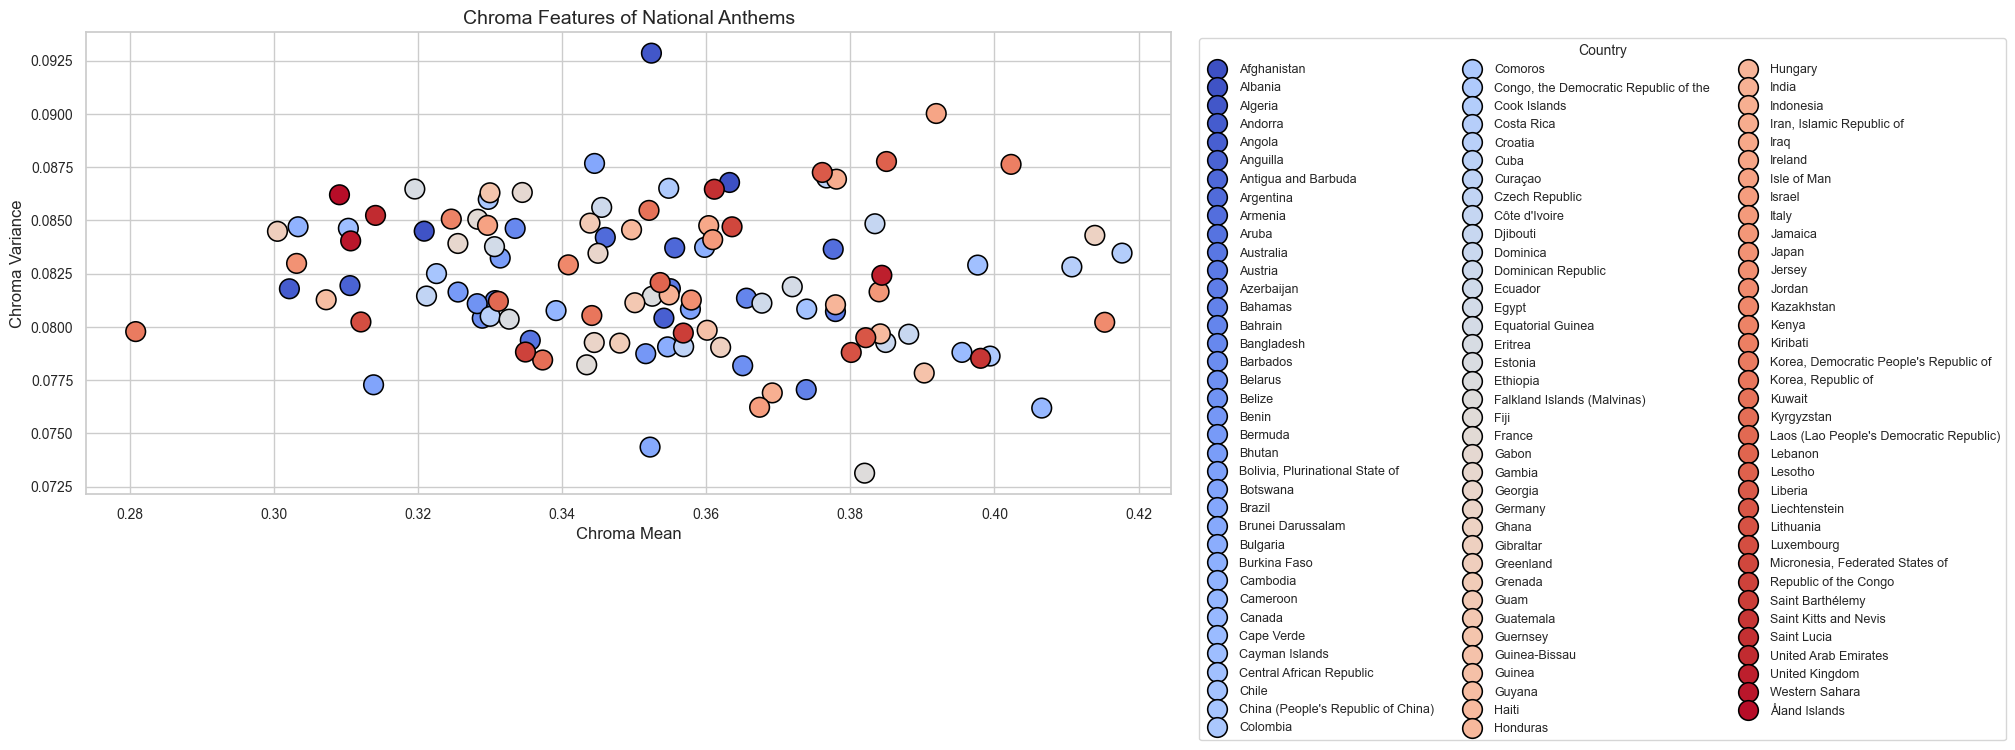

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Scatter plot for Chroma Features
plt.figure(figsize=(14, 6))  
scatter = sns.scatterplot(
    data=df, x="Chroma Mean", y="Chroma Variance", hue="Country",
    palette="coolwarm", s=200, edgecolor="black"
)

# Adjust title and labels
plt.title("Chroma Features of National Anthems", fontsize=14)
plt.xlabel("Chroma Mean", fontsize=12)
plt.ylabel("Chroma Variance", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optimize Legend
legend = plt.legend(
    title="Country", bbox_to_anchor=(1.02, 1), loc="upper left",
    fontsize=9, title_fontsize=10, ncol=3 
)
legend.get_frame().set_alpha(0.8)  

plt.grid(True)
plt.show()


# Harmonic vs. Percussive Energy Analysis

In [ ]:
data = []

def extract_harmonic_percussive(file_path, country_name):
    try:
        y, sr = librosa.load(file_path, sr=None)
        harmonic, percussive = librosa.effects.hpss(y)
        
        harmonic_energy = np.mean(np.abs(harmonic))
        percussive_energy = np.mean(np.abs(percussive))
        hpr = harmonic_energy / (percussive_energy + 1e-6)  
        
        data.append({
            "Country": country_name,
            "Harmonic Energy": harmonic_energy,
            "Percussive Energy": percussive_energy,
            "Harmonic-to-Percussive Ratio": hpr
        })
    except Exception as e:
        print(f"Error processing {country_name}: {e}")

for file in mp3_files:
    country_name = file.replace(".mp3", "")
    file_path = os.path.join(audio_folder, file)
    extract_harmonic_percussive(file_path, country_name)

df = pd.DataFrame(data)
print(df)


                  Country  Harmonic Energy  Percussive Energy  \
0             Afghanistan         0.051576           0.016717   
1                 Albania         0.077673           0.018335   
2                 Algeria         0.025227           0.008839   
3                 Andorra         0.049347           0.007773   
4                  Angola         0.066493           0.020219   
..                    ...              ...                ...   
105           Saint Lucia         0.063937           0.015481   
106  United Arab Emirates         0.065232           0.020428   
107        United Kingdom         0.052020           0.011887   
108        Western Sahara         0.067399           0.010051   
109         Åland Islands         0.028565           0.004206   

     Harmonic-to-Percussive Ratio  
0                        3.084989  
1                        4.236042  
2                        2.853749  
3                        6.347762  
4                        3.288456  
.. 

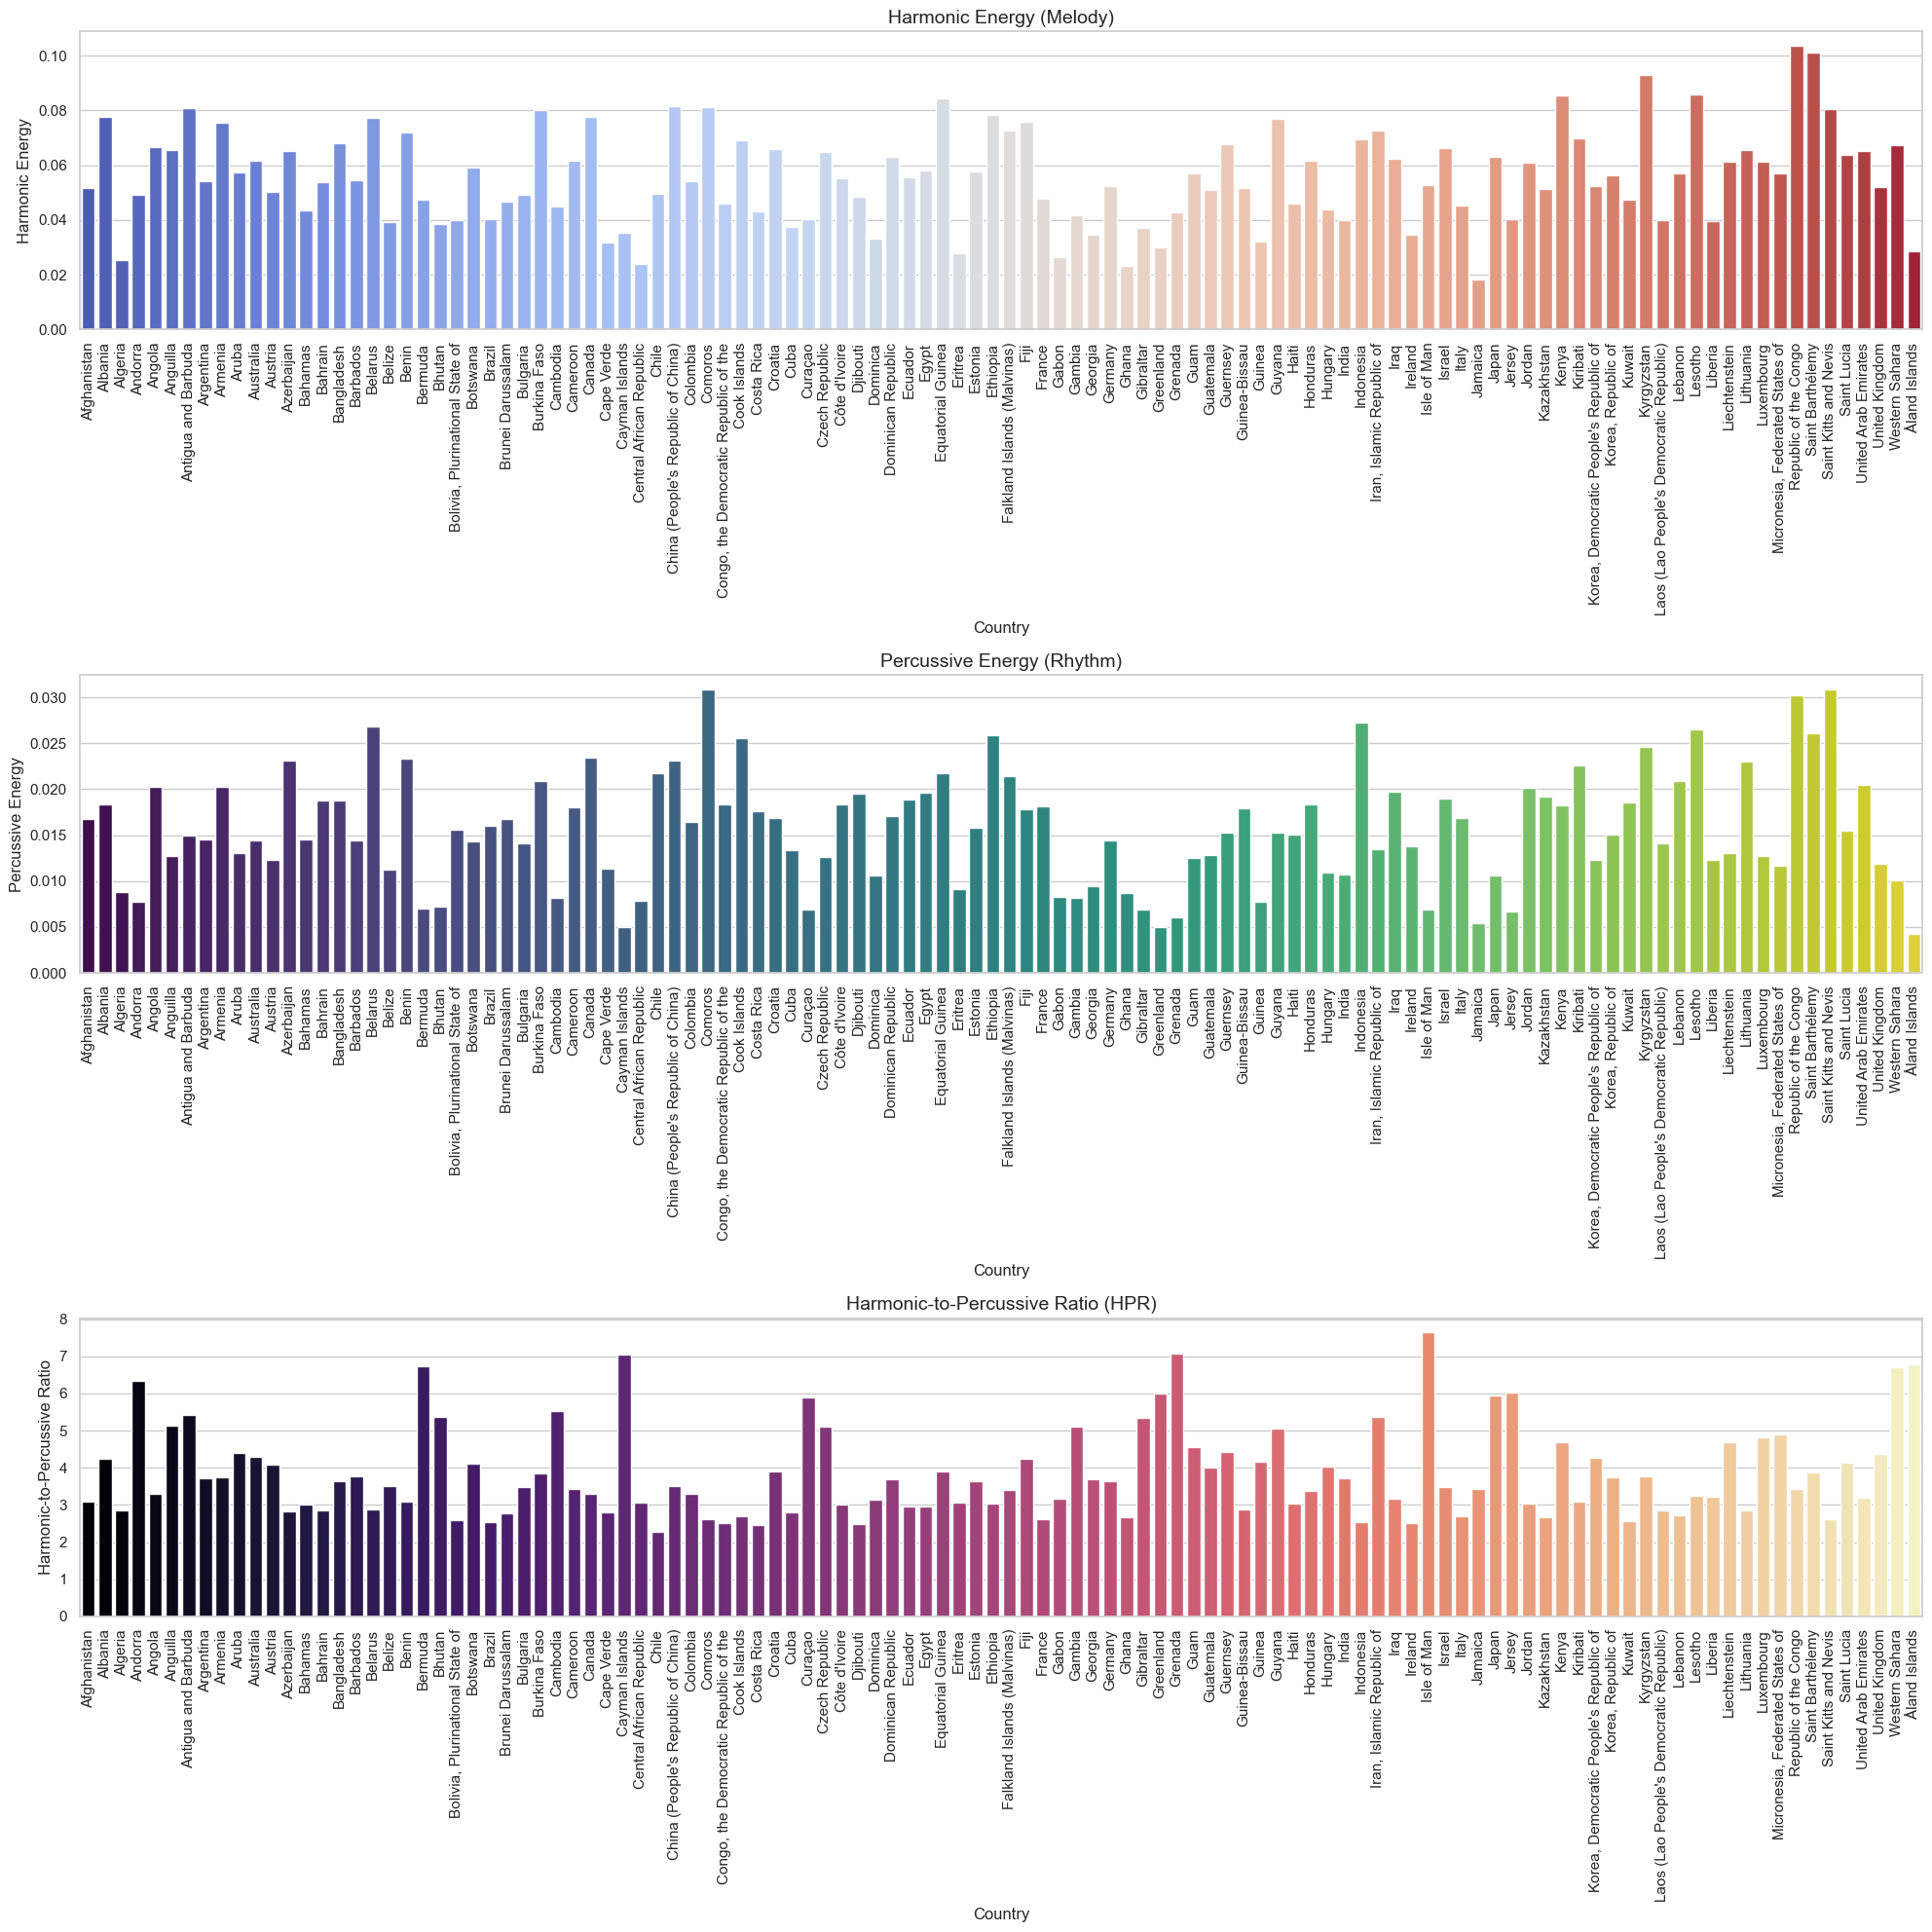

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(20, 20))    

# Plot Harmonic Energy
sns.barplot(ax=axes[0], data=df, x="Country", y="Harmonic Energy", palette="coolwarm")
axes[0].set_title("Harmonic Energy (Melody)", fontsize=14)
axes[0].tick_params(axis='x', rotation=90)  

# Plot Percussive Energy
sns.barplot(ax=axes[1], data=df, x="Country", y="Percussive Energy", palette="viridis")
axes[1].set_title("Percussive Energy (Rhythm)", fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

# Plot Harmonic-to-Percussive Ratio
sns.barplot(ax=axes[2], data=df, x="Country", y="Harmonic-to-Percussive Ratio", palette="magma")
axes[2].set_title("Harmonic-to-Percussive Ratio (HPR)", fontsize=14)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()  
plt.show()